In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io


In [5]:
from google.colab import files
uploaded = files.upload()

Saving customer_support_tickets.csv to customer_support_tickets.csv


In [11]:
#uploaded file to google colab
df = pd.read_csv(io.BytesIO(uploaded['customer_support_tickets.csv']))

In [14]:
print(df.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [15]:
# List the common issues, top 10
common_issues = df['Ticket Subject'].value_counts().head(10)
print(common_issues)

common issues :
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


Segmentation based on ticket type

In [19]:
#Segmentation based on Ticket Types
ticket_type_segmentation = df.groupby('Ticket Type').size()
print(ticket_type_segmentation)



Segmentation based on Ticket Types:
Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64


Ticket status distribution

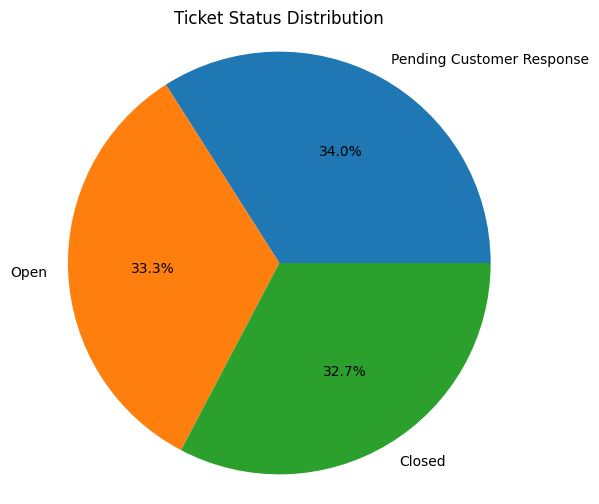

In [30]:
ticket_status_distribution = df['Ticket Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%')
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

**Ticket Channel Distribution**

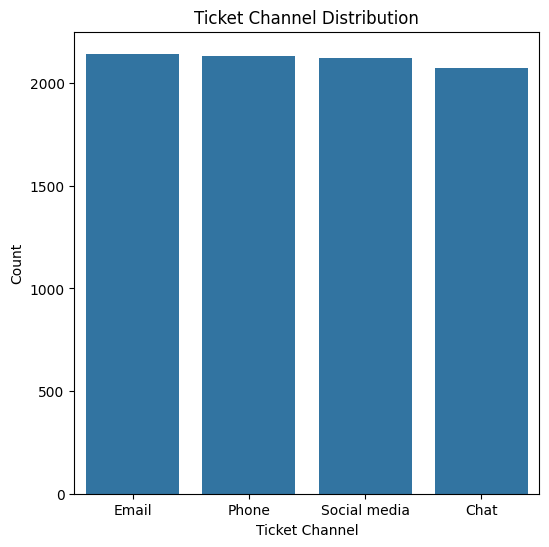

In [33]:
ticket_channel_distribution = df['Ticket Channel'].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution)
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.show()


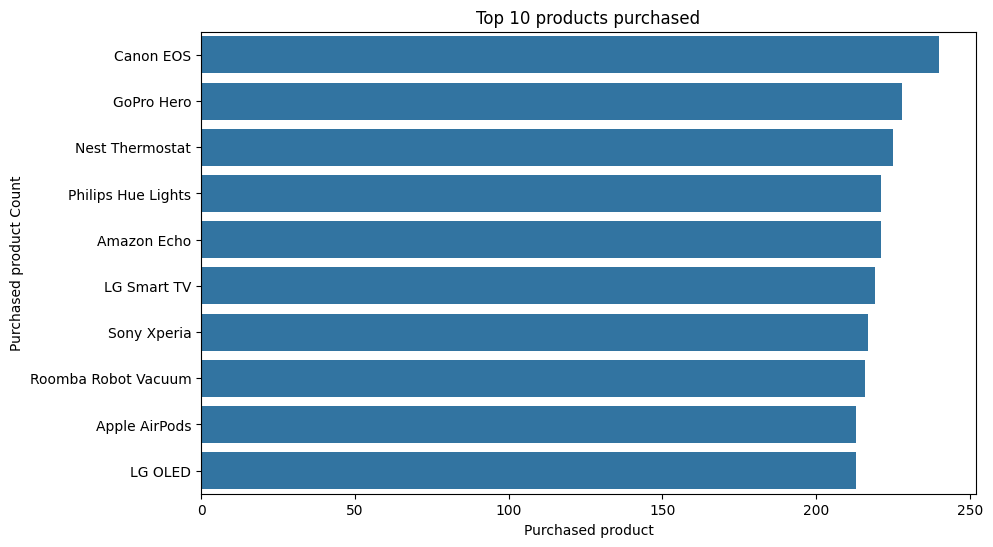

In [38]:
# top 10 product purchased distribution
top_10_product_distribution = df['Product Purchased'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_10_product_distribution.index, x=top_10_product_distribution)
plt.title('Top 10 products purchased')
plt.xlabel('Purchased product')
plt.ylabel('Purchased product Count')
plt.show()

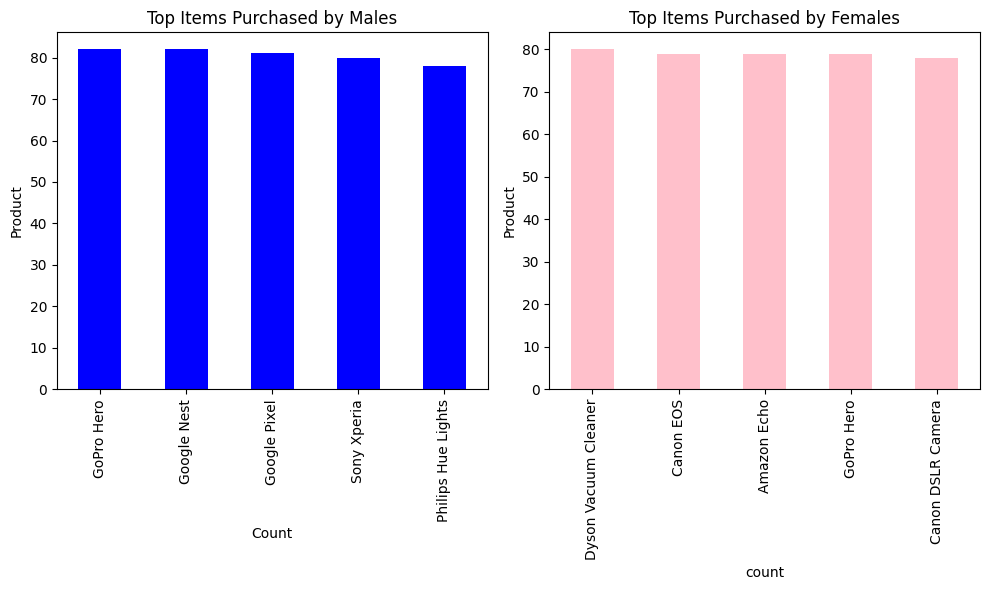

In [43]:
# Product purchasing power by Gender

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
top_items_male = df[df['Customer Gender']=='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='bar', color='blue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')

plt.subplot(1,2,2)
top_items_female = df[df['Customer Gender']=='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='bar', color='pink')
plt.title('Top Items Purchased by Females')
plt.xlabel('count')
plt.ylabel('Product')

plt.tight_layout()
plt.show()


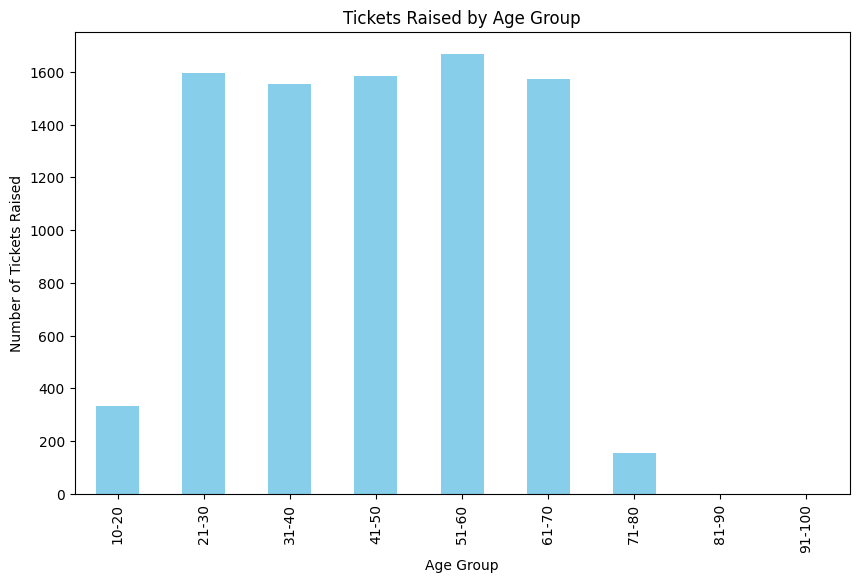

In [46]:
# Ticket Raised by age groups

plt.figure(figsize=(10, 6))

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# First put customers into diff age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)
ticket_distribution_by_age_group = df.groupby('Age Group').size()

ticket_distribution_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.show()
